# Linear Regression


In [1]:
import os
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Linear Regression with one variable

Linear regression assumes a linear relationship between the input variables (X) and the single output variable (Y). More specifically, that output (Y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

Now you will implement simple linear regression to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### 1.1 Load the dataset

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `X` and `Y`.

In [2]:
# Load dataset
with open('ex1data.txt', 'r') as file:
    data = [line.strip().split(',') for line in file.readlines()]
data = [[float(x) for x in row] for row in data]
population = [row[0] for row in data]
profit = [row[1] for row in data]

### 1.2 Plot the dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Execute the next cell to visualize the data.

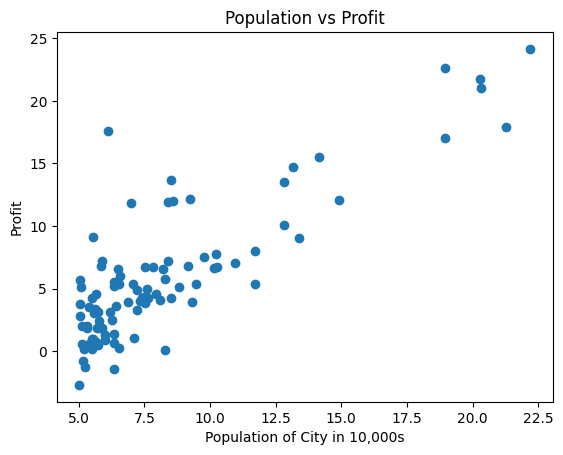

In [3]:
# Create a scatter plot
plt.scatter(population, profit)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit')
plt.title('Population vs Profit')
plt.show()

Text(0.5, 0, 'Population of City in 10,000s')

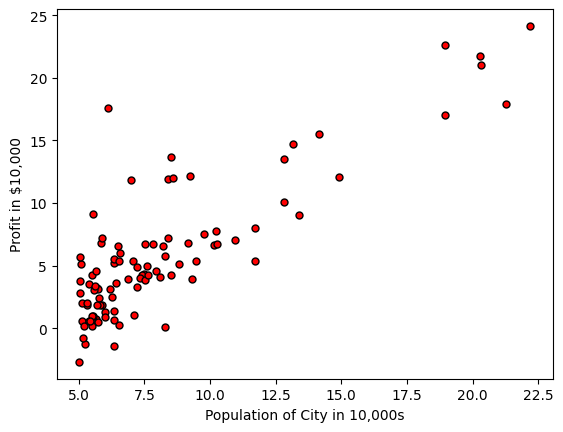

In [ ]:
# plot dataset

### 1.3 Learn the parameters
In this part, you will fit the linear regression parameters $\theta$ to the food truck dataset using gradient descent.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 ------ (i)$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x ------ (ii)$$

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) ------ (iii)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x^{(i)} ------ (iv)$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

Let's start by implementing the hypothesis $h_\theta(x)$.

In [4]:
### GRADED FUNCTION ###
def predict(x, theta0, theta1):
    '''
    Calculates the hypothesis for any input sample `x` given the parameters `theta`.

    Arguments
    ---------
    x : float
        The input sample.

    theta0 : float
        The parameter for the regression function.

    theta1 : float
        The parameter for the regression function.

    Returns
    -------
    h_x : float
        The hypothesis for input sample.

    Hint(s)
    -------
    Compute equation (ii).
    '''
    # code here

    # You need to return the following variable(s) correctly

    h_x = theta0 + theta1 * x
    return h_x
    ### START CODE HERE ### (≈ 1 line of code)

    ### END CODE HERE ###



Execute the next cell to verify your implementation.

In [5]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



As you perform gradient descent to learn minimize the cost function  $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In [6]:

def computeCost(X, Y, theta0, theta1):
    '''
    Computes cost for linear regression. Computes the cost of using `theta` as the
    parameter for linear regression to fit the data points in `X` and `Y`.

    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.

    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.

    theta0 : float
        The parameter for the regression function.

    theta1 : float
        The parameter for the regression function.

    Returns
    -------
    J : float
        The value of the regression cost function.

    Hint(s)
    -------
    Compute equation (i).
    '''
    # initialize some useful values
    # number of training examples

    # You need to return the following variable(s) correctly

    ### START CODE HERE ### (≈ 3-4 lines of code)
    # initialize some useful values
    m = len(Y)  # number of training examples

    # compute the hypothesis
    h_x = theta0 + theta1 * X

    # compute the cost
    J = (1 / (2 * m)) * sum((h_x - Y) ** 2)

    return J
    ### END CODE HERE ###

   # code here

Execute the next cell to verify your implementation.

In [7]:
X = np.array(population)
Y = np.array(profit)

In [8]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

With theta0 = 1.0, theta1 = 1.0
Predicted cost J = 10.27
Expected cost J = 10.27



Next, you will complete a function which implements gradient descent. The loop structure has been written for you, and you only need to supply the updates to parameters $\theta_j$  within each iteration (epoch).

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented `gradientDescent` and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [9]:
def gradientDescent(X, Y, alpha, n_epoch):
    """
    Performs gradient descent to learn `theta`. Updates `theta` by taking `n_epoch`
    gradient steps with learning rate `alpha`.

    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.

    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.

    alpha : float
        The learning rate.

    n_epoch : int
        The number of iterations for gradient descent.

    Returns
    -------
    theta0 : float
        The parameter for the regression function.

    theta1 : float
        The parameter for the regression function.

    J : list
        A python list for the values of the cost function after each iteration.
    """
    m = len(X)  # number of training examples
    J = []  # list to store cost
    theta0 = 0  # initialize theta0
    theta1 = 0  # initialize theta1

    for i in range(n_epoch):
        # Compute the partial derivatives
        temp0 = (1/m) * sum([(theta0 + theta1 * X[j]) - Y[j] for j in range(m)])
        temp1 = (1/m) * sum([((theta0 + theta1 * X[j]) - Y[j]) * X[j] for j in range(m)])

        # Update the parameters
        theta0 = theta0 - alpha * temp0
        theta1 = theta1 - alpha * temp1

        # Compute and store the cost
        J.append(computeCost(X, Y, theta0, theta1))

    return theta0, theta1, J

Execute the next cell to verify your implementation.

In [10]:
n_epoch = 1500
alpha = 0.01

theta0, theta1, J = gradientDescent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))
print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

Predicted theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834
Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834


### 1.4 Plot the linear fit

Use your learned parameters $\theta_j$ to plot the linear fit.

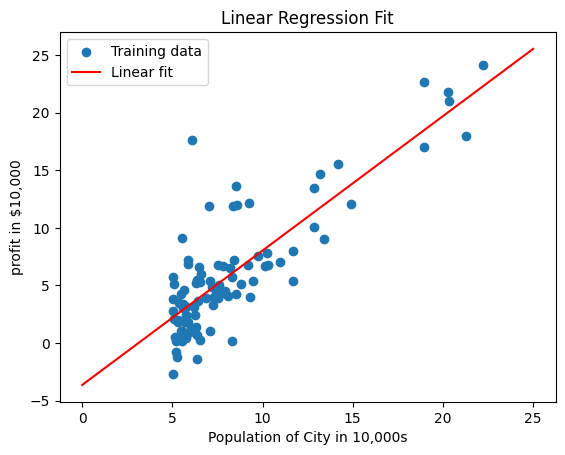

In [11]:
x_values = [i for i in range(26)]
# Calculate the corresponding y values using the learned parameters
y_values = [theta0 + theta1 * i for i in x_values]
# Create the plot
plt.scatter(X, Y, label='Training data')
plt.plot(x_values, y_values, label='Linear fit', color='r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('profit in $10,000')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

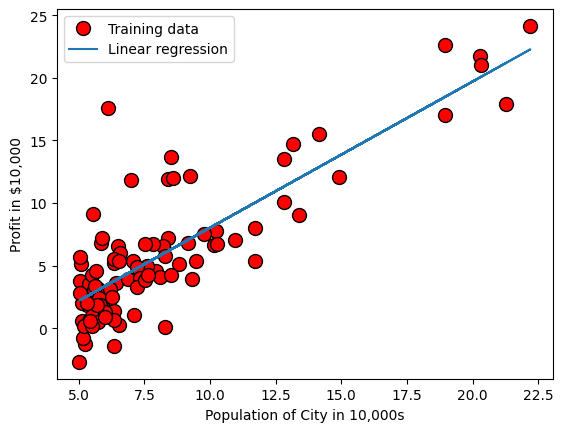

In [ ]:
# code here

### 1.5 Make predictions

Use your learned parameters $\theta_j$ to make food truck profit predictions in areas with population of 40,000 and 65,000.

In [12]:
def predict(population, theta0, theta1):
    return theta0 + theta1 * population

print('For population = 40,000, predicted profit = $%.2f' % (predict(4, theta0, theta1)*10000))
print('For population = 65,000, predicted profit = $%.2f' % (predict(6.5, theta0, theta1)*10000))

For population = 40,000, predicted profit = $10351.58
For population = 65,000, predicted profit = $39510.64


## 2. Multivariate Linear Regression

Now, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately.

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

In [23]:
train_X = np.loadtxt(r"D:\junotbok\7th week\ex2traindata.txt")
train_Y = np.loadtxt(r"D:\junotbok\7th week\ex2trainlabels.txt")
test_X = np.loadtxt(r"D:\junotbok\7th week\ex2testdata.txt")
test_Y = np.loadtxt(r"D:\junotbok\7th week\ex2testlabels.txt")

In [24]:
# Feature normalization
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

train_X_normalized = normalize_features(train_X)
test_X_normalized = normalize_features(test_X)

train_X_with_bias = np.hstack((np.ones((train_X_normalized.shape[0], 1)), train_X_normalized))
test_X_with_bias = np.hstack((np.ones((test_X_normalized.shape[0], 1)), test_X_normalized))

In [25]:
# Hypothesis function for multivariate linear regression
def hypothesis(theta, X):
    return np.dot(X, theta)

# Cost function (mean squared error)
def cost_function(theta, X, y):
    m = y.shape[0]
    predictions = hypothesis(theta, X)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient descent for multivariate linear regression
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = y.shape[0]
    for _ in range(num_iterations):
        predictions = hypothesis(theta, X)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta = theta - alpha * gradient
    return theta

In [26]:
# Initialize theta with zeros
theta = np.zeros(train_X_with_bias.shape[1])

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the model
theta = gradient_descent(train_X_with_bias, train_Y, theta, learning_rate, num_iterations)

In [27]:
# Test the model on the test set
test_cost = cost_function(theta, test_X_with_bias, test_Y)
print("Test Mean Squared Error:", test_cost)

Test Mean Squared Error: 10.183193626670956


## 3. Regularized Linear Regression

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [29]:
''' Start your code of part 3 from here, add the new code cells as per your requirement. '''

' Start your code of part 3 from here, add the new code cells as per your requirement. '

In [30]:
# Load the dataset
train_X = np.loadtxt(r"D:\junotbok\7th week\ex2traindata.txt")
train_Y = np.loadtxt(r"D:\junotbok\7th week\ex2trainlabels.txt")
test_X = np.loadtxt(r"D:\junotbok\7th week\ex2testdata.txt")
test_Y = np.loadtxt(r"D:\junotbok\7th week\ex2testlabels.txt")

In [31]:
# Feature normalization
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

train_X_normalized = normalize_features(train_X)
test_X_normalized = normalize_features(test_X)

In [32]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(train_X_normalized, train_Y)
lr_pred = lr_model.predict(test_X_normalized)
lr_mse = mean_squared_error(test_Y, lr_pred)
print("Linear Regression MSE:", lr_mse)

Linear Regression MSE: 20.982945190702583


In [33]:
# Ridge Regression
alphas = [0.1, 1, 10, 50, 100]
ridge_coefs = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(train_X_normalized, train_Y)
    ridge_pred = ridge_model.predict(test_X_normalized)
    ridge_mse = mean_squared_error(test_Y, ridge_pred)
    print("Ridge Regression (alpha={}) MSE:".format(alpha), ridge_mse)
    ridge_coefs.append(ridge_model.coef_)

Ridge Regression (alpha=0.1) MSE: 20.974216161880662
Ridge Regression (alpha=1) MSE: 20.899200400251676
Ridge Regression (alpha=10) MSE: 20.38665678748075
Ridge Regression (alpha=50) MSE: 19.85929705218703
Ridge Regression (alpha=100) MSE: 20.303875349886273


Ridge Regression: The MSE for Ridge Regression decreases as alpha increases from 0.1 to 10, indicating that the model is becoming more regularized and reducing overfitting. However, as alpha increases further to 50 and 100, the MSE starts to increase, suggesting that the model is becoming too regularized and losing its ability to fit the data.

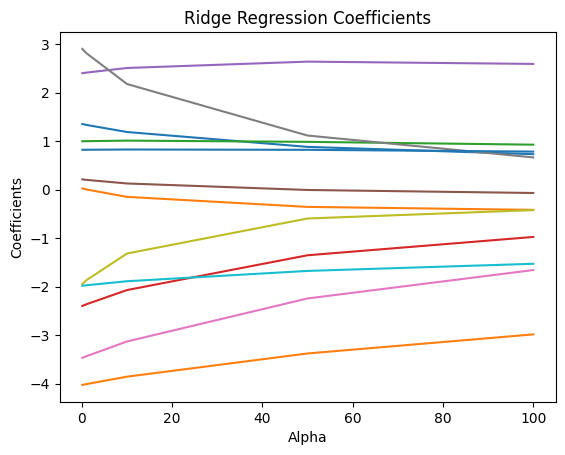

In [34]:
# Plot Ridge coefficients
plt.plot(alphas, [coef[1:] for coef in ridge_coefs])
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Ridge Regression Coefficients")
plt.show()

In [35]:
# Lasso Regression
alphas = [0.1, 1, 10, 50, 100]
lasso_coefs = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(train_X_normalized, train_Y)
    lasso_pred = lasso_model.predict(test_X_normalized)
    lasso_mse = mean_squared_error(test_Y, lasso_pred)
    print("Lasso Regression (alpha={}) MSE:".format(alpha), lasso_mse)
    lasso_coefs.append(lasso_model.coef_)

Lasso Regression (alpha=0.1) MSE: 20.159551642503327
Lasso Regression (alpha=1) MSE: 22.904857281037295
Lasso Regression (alpha=10) MSE: 83.71085929676252
Lasso Regression (alpha=50) MSE: 83.71085929676252
Lasso Regression (alpha=100) MSE: 83.71085929676252


Lasso Regression: The MSE for Lasso Regression decreases as alpha increases from 0.1 to 1, but then increases dramatically as alpha increases further to 10, 50, and 100. This suggests that Lasso Regression is more sensitive to the choice of alpha, and that a high value of alpha can lead to over-regularization and poor performance.

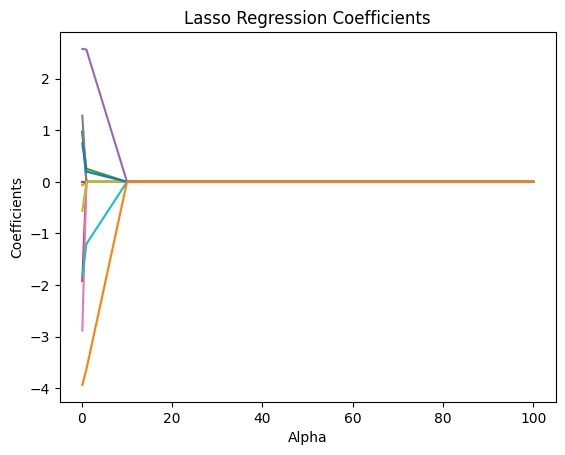

In [36]:
# Plot Lasso coefficients
plt.plot(alphas, [coef[1:] for coef in lasso_coefs])
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Lasso Regression Coefficients")
plt.show()

In [37]:
# Elastic Net Regression
alphas = [0.1, 1, 10, 50, 100]
elastic_net_coefs = []
for alpha in alphas:
    elastic_net_model = ElasticNet(alpha=alpha)
    elastic_net_model.fit(train_X_normalized, train_Y)
    elastic_net_pred = elastic_net_model.predict(test_X_normalized)
    elastic_net_mse = mean_squared_error(test_Y, elastic_net_pred)
    print("Elastic Net Regression (alpha={}) MSE:".format(alpha), elastic_net_mse)
    elastic_net_coefs.append(elastic_net_model.coef_)

Elastic Net Regression (alpha=0.1) MSE: 19.909825875594695
Elastic Net Regression (alpha=1) MSE: 25.162631857644033
Elastic Net Regression (alpha=10) MSE: 77.58567209337414
Elastic Net Regression (alpha=50) MSE: 83.71085929676252
Elastic Net Regression (alpha=100) MSE: 83.71085929676252


Elastic Net Regression: The MSE for Elastic Net Regression follows a similar pattern to Ridge Regression, with the MSE decreasing as alpha increases from 0.1 to 10, and then increasing as alpha increases further to 50 and 100. However, the MSE values for Elastic Net Regression are generally higher than those for Ridge Regression, suggesting that Elastic Net may not be as effective in reducing overfitting in this case.